In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from functions import *
from skimage import color
from PIL import Image
from importlib import reload

In [28]:
def toInt(img):
    assert img.max()<=1
    return (img*255).astype(np.uint8)

In [16]:
im=plt.imread('places-test/Places365_val_%08d.jpg'%33)/255
lab=color.rgb2yuv(im)
ende=bins2yuv(yuv2bins(lab[:,:,1:]),lab[:,:,:1])
reconst=np.clip(color.yuv2rgb(ende),0,1)

In [42]:
import functions
bins2yuv =reload(functions).bins2yuv
im=plt.imread('places-test/Places365_val_%08d.jpg'%33)/255
lab=color.rgb2lab(im)
labbins=torch.load('resources/lab_bins.pt').numpy()[None,...]
ende=bins2yuv(yuv2bins(lab[:,:,1:],labbins),lab[:,:,:1],bins=labbins)
labrec=np.clip(color.lab2rgb(ende),0,1)

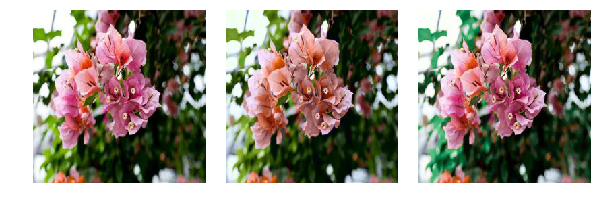

In [43]:
plt.figure(figsize=(10,4))
pix=(np.hstack((im,np.ones((256,30,3)),reconst,np.ones((256,30,3)),labrec))*255).astype(np.uint8)
plt.imshow(pix)
plt.axis('off')
#plt.title('Demonstration of sufficient bottelneck dimensionality')
#plt.savefig('figures/bottelneckdemo.pdf')
plt.show()

In [44]:
Image.fromarray(toInt(labrec)).save('figures/bin-reconstruction-lab150.png')